## PCA Analysis

In this notebook we look at the PCA analysis of our data. We focus on the 6 main predictors considered so far. We will look at the explained variance and the loadings.

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import "good_tracts.csv"
good_tracts = pd.read_csv("good_tracts.csv")
good_tracts.head()

,state,tract,BLL_geq_5,BLL_geq_10,tested,year,tested_suppressed,tested_ell,zero_sup_tested,BLL_geq_5_suppressed,...,svi_socioeconomic_pctile,ped_per_100k,under_yo5_ppl,STATE_NAME,COUNTY,tests_p_kid,county,town,start_year,end_year
0,OH,39001770100,0,0.0,7,2011,False,5.0,False,False,...,0.993081,-1.326709,335,Ohio,Adams County,0.020896,NaN,NaN,NaN,NaN
1,OH,39001770200,5,0.0,11,2011,False,5.0,False,True,...,0.994219,-1.326709,322,Ohio,Adams County,0.034161,NaN,NaN,NaN,NaN
2,OH,39001770400,0,0.0,15,2011,False,5.0,False,False,...,1.184587,-1.326709,384,Ohio,Adams County,0.039062,NaN,NaN,NaN,NaN
3,OH,39001770500,5,0.0,9,2011,False,5.0,False,True,...,1.290768,-1.326709,204,Ohio,Adams County,0.044118,NaN,NaN,NaN,NaN
4,OH,39001770600,0,0.0,13,2011,False,5.0,False,False,...,1.379126,-1.326709,229,Ohio,Adams County,0.056769,NaN,NaN,NaN,NaN


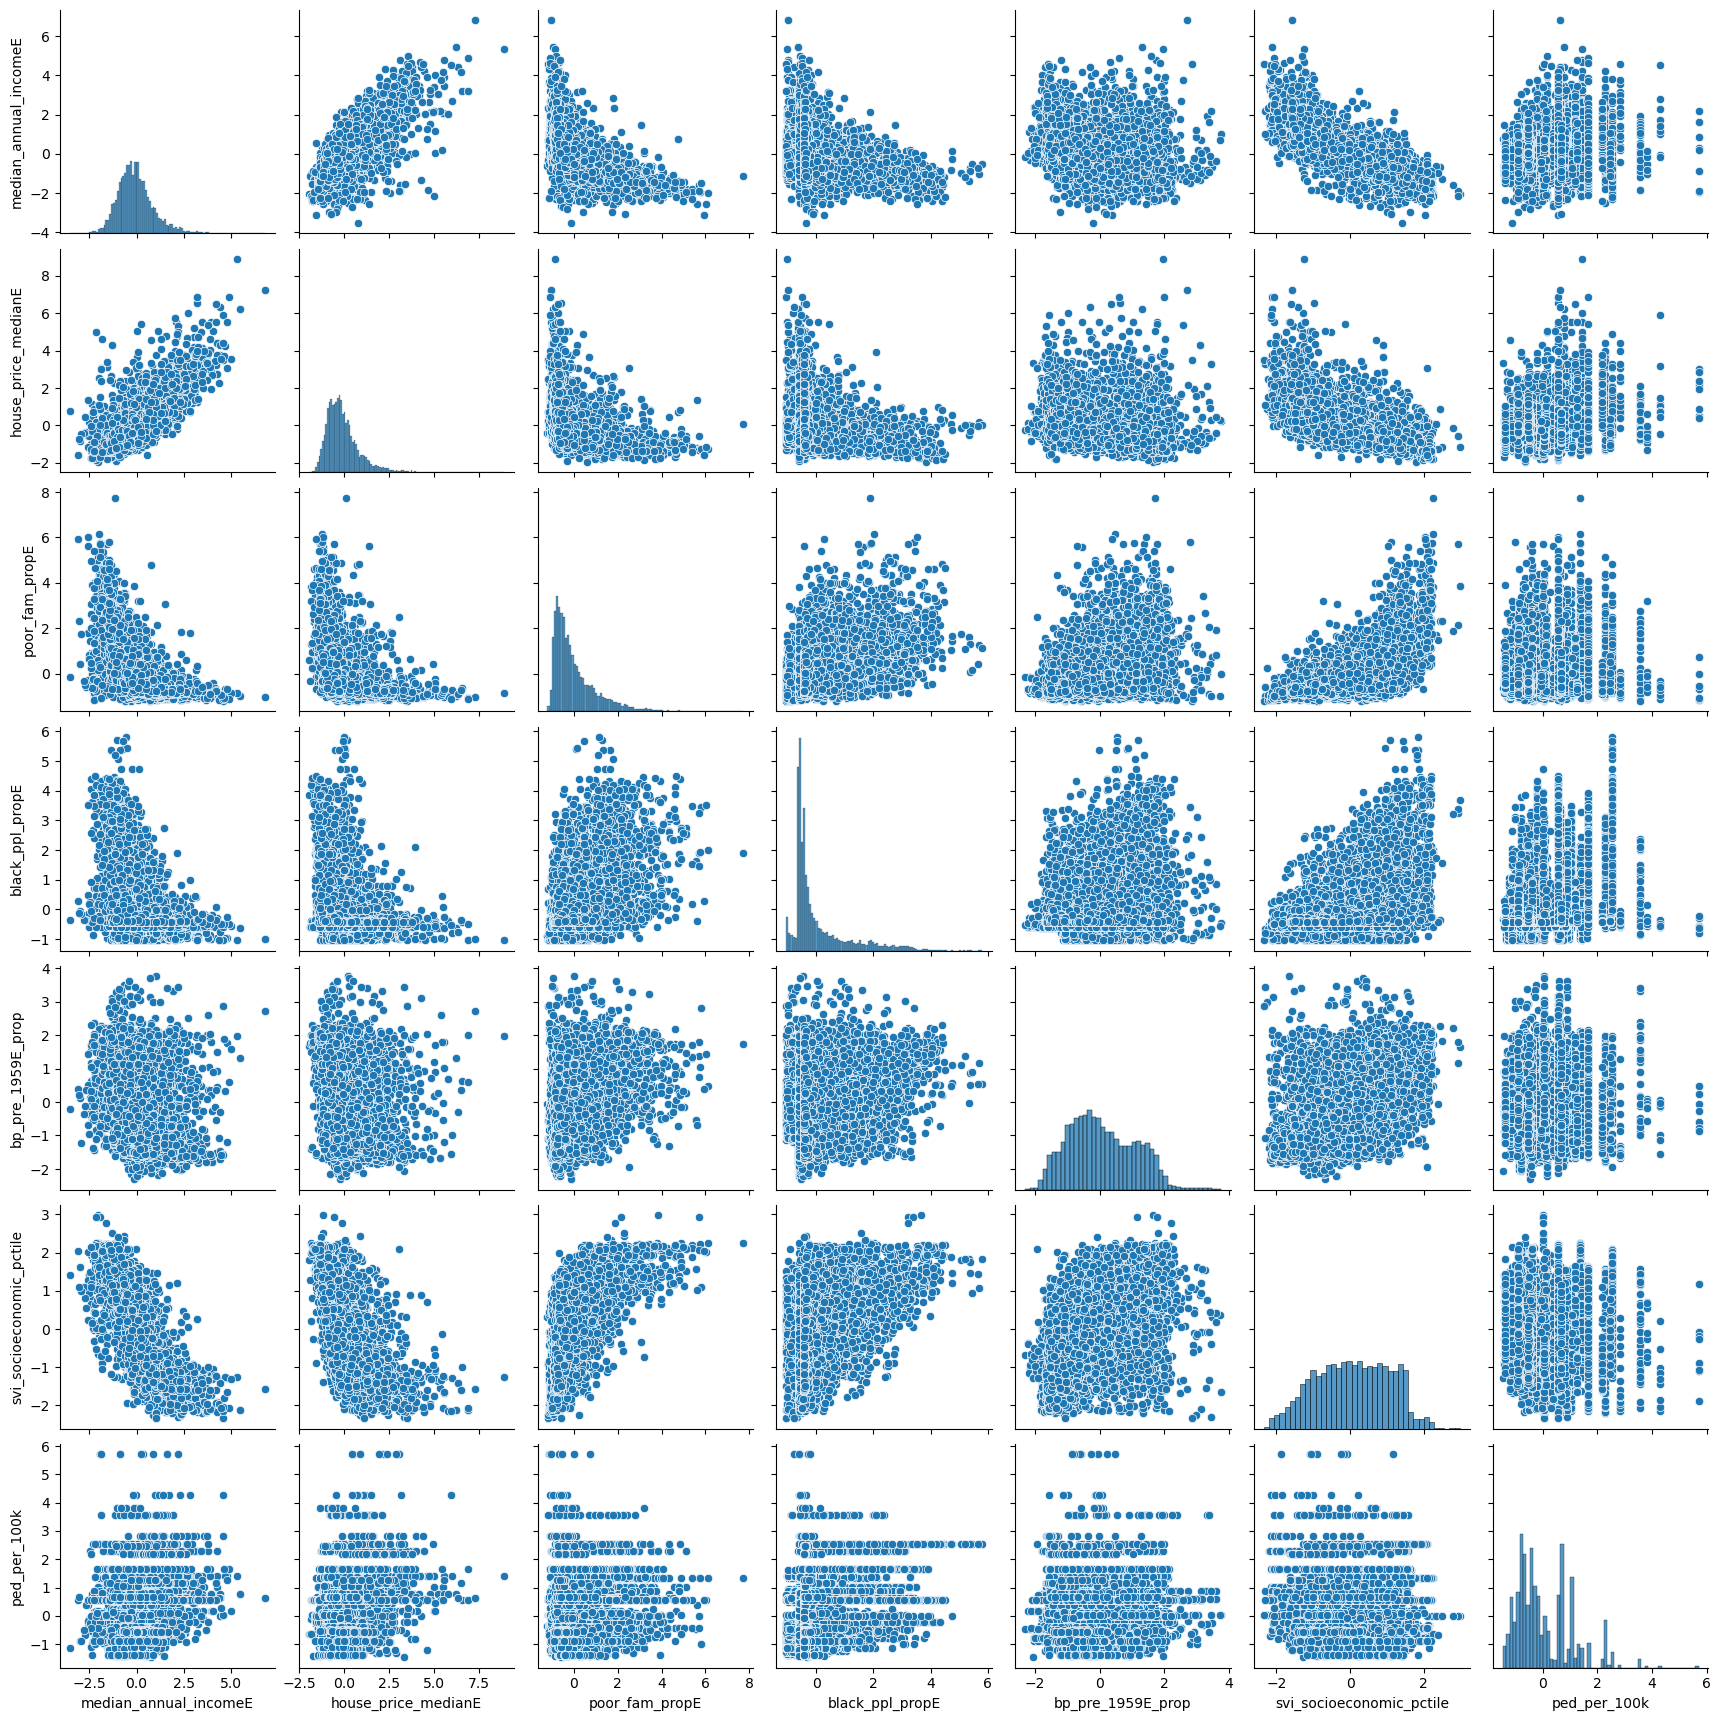

In [6]:
# quickly plot the standardised features
features = [
    "median_annual_incomeE",
    "house_price_medianE",
    "poor_fam_propE",
    "black_ppl_propE",
    "bp_pre_1959E_prop",
    "svi_socioeconomic_pctile",
    "ped_per_100k"
]

sns.pairplot(good_tracts[features])
plt.show()

In [23]:
# fit PCAs 
nr_pcas = 6

pca = PCA(n_components=nr_pcas)
pcs = pca.fit_transform(good_tracts[features[:-1]])

# into df
pcs_df = pd.DataFrame(pcs, columns=[f"PC{i}" for i in range(1, nr_pcas+1)])
pcs_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.001111,-1.337607,-0.599469,1.155150,0.399993,0.289263
1,-0.367872,-1.087984,0.076192,0.313366,0.704000,-0.148688
2,-0.887063,-1.389166,-0.451567,0.855296,0.505571,-0.120065
3,-0.830747,-1.633863,-0.585187,0.713533,0.766403,-0.009572
4,-1.399087,-1.476782,0.114386,0.531664,0.537132,-0.006626


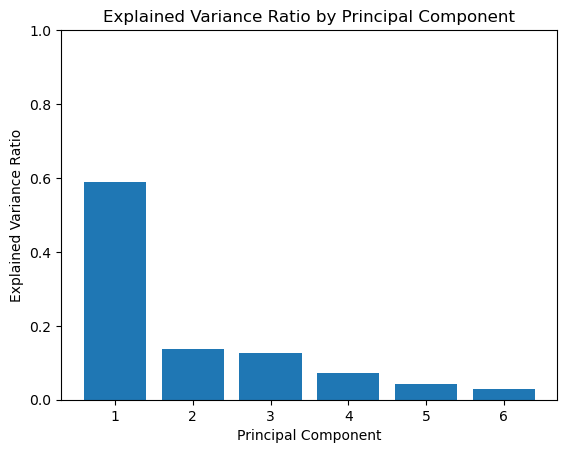

In [29]:
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.title('Explained Variance Ratio by Principal Component')
plt.ylim(0, 1)
plt.show()

In [30]:
# create df of loadings
loadings = pd.DataFrame(pca.components_, columns=features[:-1], index=[f"PC{i}" for i in range(1, nr_pcas+1)])
loadings

,median_annual_incomeE,house_price_medianE,poor_fam_propE,black_ppl_propE,bp_pre_1959E_prop,svi_socioeconomic_pctile
PC1,0.450543,0.415048,-0.439017,-0.342568,-0.308245,-0.468660
PC2,0.393003,0.470131,0.209521,0.594313,0.456793,-0.136961
PC3,0.030281,-0.042750,-0.225234,-0.524538,0.817994,0.047645
PC4,0.017701,0.436192,0.726617,-0.496453,-0.105146,0.154692
PC5,-0.181563,0.533398,-0.427792,0.070474,-0.078707,0.698823
PC6,-0.779977,0.360704,-0.040695,0.053538,0.099801,-0.497037


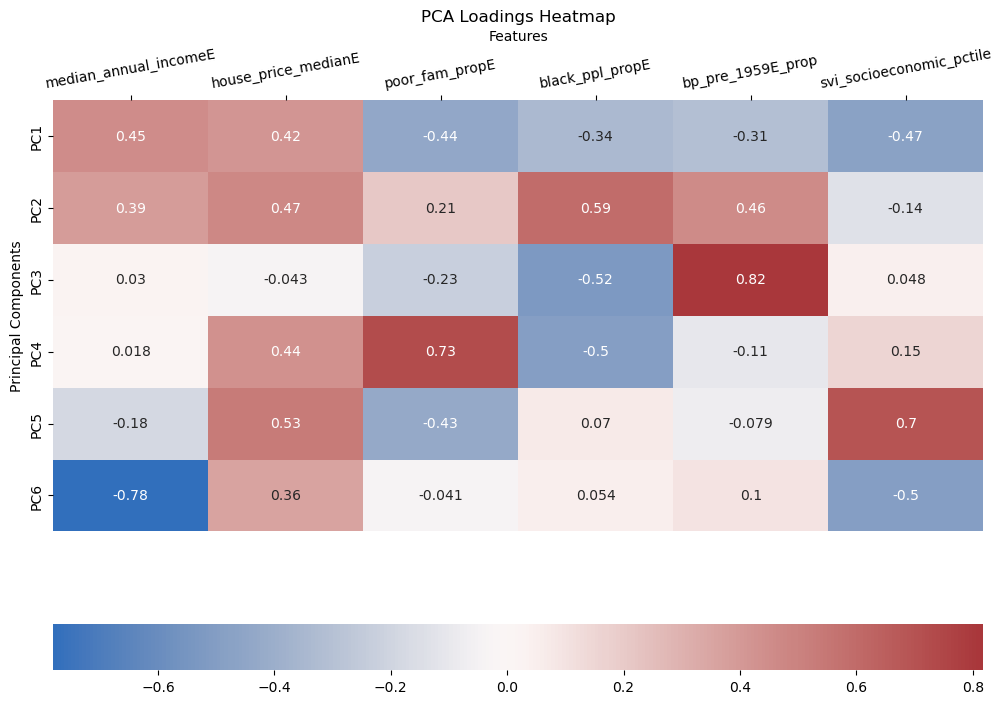

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming loadings DataFrame is already defined
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='vlag', center=0, cbar_kws={'orientation': 'horizontal'})
plt.title('PCA Loadings Heatmap')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
plt.xticks(rotation=10)
plt.show()

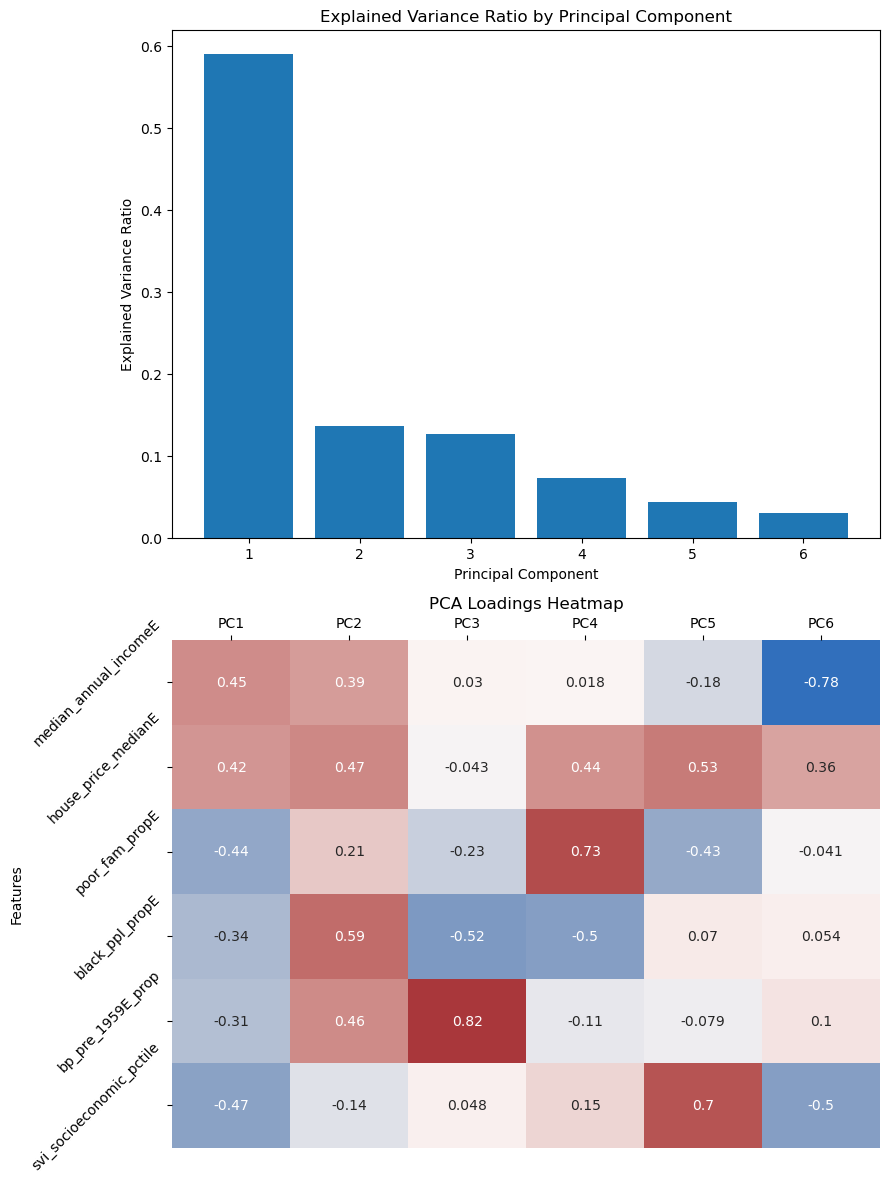

In [46]:
# combine both plots in one figure

explained_variance_ratio = pca.explained_variance_ratio_

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 12))

# Bar chart for explained variance ratio
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_xlabel('Principal Component')
ax1.set_title('Explained Variance Ratio by Principal Component')

# Transpose loadings to flip axes
transposed_loadings = loadings.T

# Heatmap for PCA loadings
sns.heatmap(transposed_loadings, annot=True, cmap='vlag', center=0, cbar=False, ax=ax2)
ax2.set_title('PCA Loadings Heatmap')
ax2.set_ylabel('Features')
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')
plt.yticks(rotation=45)

# tight layout
plt.tight_layout()
plt.show()